<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/%5BWELayer%20CNN_or_CNN%20LSTM%5D%20Banking%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation

In [1]:
#download data
!gdown --id xx
!gdown --id xx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 200MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 77.3MB/s]


In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [4]:
train.head(5)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...
1,1,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainDataV4_RetagCLS-12_Sampling53_P...,NaN,NaN,SocialMedia,Twitter,5fffc6bcb08b583a24679d59,Q202106_5805,Q202106_5805_1,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,Security,12,neutral,o,ปกติ|จะ|ไม่ชอบ| |log| |in| |ใดๆ| |ใน|ค|อม|คนอื...
2,2,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1200_2022...,Krungthai_NEXT,krungthai,SocialMedia,facebook,10161808181448916_1330115550790924,Q2207_636,Q2207_636_1,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,"Product and Service, System",7,negative,n,ktb| |care| |ณ|.| |ตอนนี้|ยอด|ก็|ยัง|ไม่|เข้า|...
3,3,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,27634345,Q202106_961,Q202106_961_1,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,Staff Quality,4,negative,n,scb_thailand| |เรียน| |scb| |ขอ|เบอร| |ตืด|ต่อ...
4,4,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,28297653,Q202106_2021,Q202106_2021_1,ไอเลิ้บ TMB All Free มาก แต่ช่วยพัฒนาแอพให้สเถ...,ไอเลิ้บ TMB All Free มาก,"Product and Service, Usage and Condition",8,positive,p,ไอ|เลิ้บ| |tmb_all_free| |มาก|


In [5]:
train['Human_CategoryID'].sort_index(ascending=True).value_counts()

7     3275
8     2454
13    2133
5     1163
6     1109
4      522
10     379
3      377
11     232
1      185
9      153
12     152
2       16
Name: Human_CategoryID, dtype: int64

#Create a Vocabulary

In [6]:
from collections import Counter

vocab = Counter()
def data_to_vocab(df):
  for verbatim in df['Text_ws_local']:
    tokens = verbatim.split()
    tokens = [word for word in tokens if len(tokens) > 4] #at first = 1, CNN GMP is better with >4 for ~2%
    vocab.update(tokens)

data_to_vocab(train)

print(len(vocab))
vocab.most_common(20)

46943


[('|scb|', 1518),
 ('|friendtag|', 625),
 ('|2|', 512),
 ('|kbank|', 403),
 ('|บาท|', 360),
 ('|1|', 340),
 ('|3|', 329),
 ('|5|', 298),
 ('|tmb|', 251),
 ('|call_center|', 250),
 ('|atm|', 249),
 ('atm|', 245),
 ('|scb_easy|', 201),
 ('|telephonetag|', 199),
 ('|app|', 199),
 ('|กรุงไทย|', 198),
 ('|-|', 184),
 ('|sms|', 178),
 ('|ktc|', 176),
 ('|ของ|', 164)]

In [7]:
min_occurence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurence]

In [8]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
  
save_list(tokens, 'vocab.txt')

#Train Embedding Layer

In [9]:
#Load the vocab as above
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

print(vocab)

{'|โครต|เชง|', '|ปี|ค่ะ|', '|bitkub|', '|เลข|อ้างอิง|', '|ขึ้น|ว่า|', 'โอนเงิน|จาก|kbank|', '|mind|', '|แค่|ยื่น|บัตร|ให้|', '|ให้|หมด|', '|ไป|เมื่อ|วัน|ที่', '|เงิน|ไม่|เข้า|ค่ะ|', '|เรียบร้อยแล้ว|', '|ทุกปี|', '|วัน|ทำการ|ครับ|', '|ลงทุน|', '|1600|', '|โอนเงิน|ไป|แล้ว|', '|พอ|มี|โครงการ|พัก|หนี้|', '|15.30|', '|ช|', '|ถ้า|ยื่น|กู้|กับ|', '|อี|ค|วัย|', '|บอก|ว่า|', '|ais|', '2|9|', 'ขอ|สอบถาม|หน่อย|ค่า|', '|เปิด|', '|ทุ่ม|ครึ่ง|', '|ฮือ|', '|ปี|ครับ', '|แต่|เจ้าหน้าที่|', '|telephonetag|', '|เข้า|ทุกเดือน|ไม่ค่อย|มีเงิน|นิ่ง|ๆ|', '|คือ|ยังไง|', '|ธนชาต|', '|ค|ห|', '|k-esaving|', '|โดยตรง|', '|ad|', '|ลด|', '|มา|kbank|', '|เครื่อง|', '|ยืนยัน|ที่|ตู้', '|โทร|ตั้งแต่|', '|ครับผม|', '|มาแล้ว|', '|แย่มาก|', '|bk|', '|2300|', '|atmdebit|', 'scbs|', '|คนละ|ครึ่ง|เฟส|', '|อยู่|ค่ะ|', '|taxi|', '|แห|นะ', '|เงิน|ใน|', '|แต่|เงิน|ไม่|เข้า|ปลายทาง|', '|เบื้องต้น|', '|pro|', '|ธนาคาร|ก็|ปิด|ทำการ|แล้ว|', '|เครื่อง|เก่า|', '|ต้อง|เปิดบัญชี|', '|ไหม|', '|ktbnext|', '|เดือน|นี้|', 'ฝาก|ธนาคาร|ก็ได้|

In [10]:
#Turn Series into lists
train_docs = train['Text_ws_local'].tolist()
test_docs = test['Text_ws_local'].tolist()

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#one hot-enconding for the text like > https://stackoverflow.com/questions/69026891/what-is-keras-tokenizer-fit-on-texts-doing
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [12]:
#Find the most max lengths of word in verbatims from both train and test
max_length_train = max([len(s.split()) for s in train_docs])
max_length_test  = max([len(s.split()) for s in test_docs])
max_length = max([max_length_train, max_length_test])
print("Max Length of Words: ", max_length)

#Padding in order to equalize some verbatims that do not contain the same length of the max length verbatim
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#define the labels
ytrain = np.array(train['Human_CategoryID'].tolist())

Max Length of Words:  66


In [13]:
#Do the same for the test set
encoded_docs_test = tokenizer.texts_to_sequences(test_docs)

Xtest = pad_sequences(encoded_docs_test, maxlen=max_length)
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 12


In [15]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [16]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [17]:
vocab_size = len(tokenizer.word_index)+1

#Model CNN (MaxPooling1D(pool_size=2)) 24.421594

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
#MaxPool1D: pool_size=2: 28
#MaxPool1D: pool_size = 2, strides = 2: 24.421594
#MaxPool1D(): w/o specification: 26-30

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 66, 50)            630450    
                                                                 
 conv1d_23 (Conv1D)          (None, 64, 32)            4832      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_49 (Dense)            (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 1s 5ms/step - loss: 1.9013 - acc: 0.3578 - val_loss: 1.5954 - val_acc: 0.4663
Epoch 2/10
152/152 [==============================] - 1s 4ms/step - loss: 1.4668 - acc: 0.5271 - val_loss: 1.4421 - val_acc: 0.5309
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: 1.0903 - acc: 0.6687 - val_loss: 1.3278 - val_acc: 0.5807
Epoch 4/10
152/152 [==============================] - 1s 4ms/step - loss: 0.7699 - acc: 0.7605 - val_loss: 1.4676 - val_acc: 0.5765


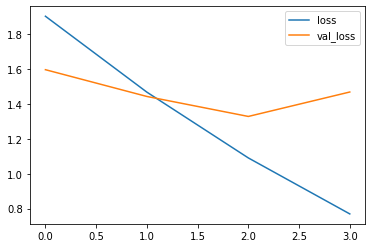

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

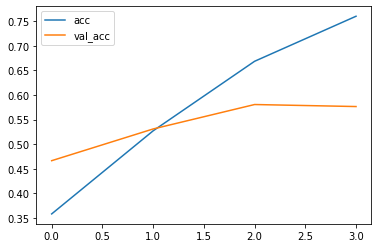

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(Xtest.shape, ytest.shape)

(389, 66) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 2ms/step - loss: 2.4676 - acc: 0.2339
Test Accuracy: 23.393317


#Model LSTM + CNN (MaxPooling1D(pool_size=2)) 33.334190

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(LSTM(50, return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

#CNN + LSTM
#MaxPool1D: pool_size=2: 30
#MaxPool1D: w/o specification: 30

#LSTM + CNN
#MaxPool1D: w/o specification: 33.676094

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 66, 100)           1260900   
                                                                 
 lstm_34 (LSTM)              (None, 66, 50)            30200     
                                                                 
 conv1d_24 (Conv1D)          (None, 64, 32)            4832      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_51 (Dense)            (None, 512)               524800    
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 4s 9ms/step - loss: 1.6521 - acc: 0.4567 - val_loss: 1.3808 - val_acc: 0.5432
Epoch 2/10
304/304 [==============================] - 2s 7ms/step - loss: 1.1581 - acc: 0.6359 - val_loss: 1.3165 - val_acc: 0.5733
Epoch 3/10
304/304 [==============================] - 2s 7ms/step - loss: 0.8634 - acc: 0.7171 - val_loss: 1.3723 - val_acc: 0.5770


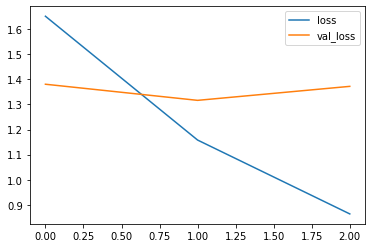

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

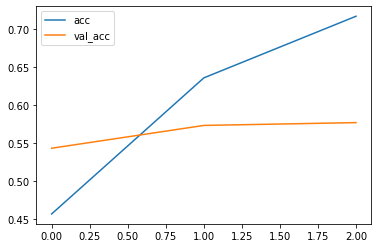

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 3ms/step - loss: 2.2924 - acc: 0.2853
Test Accuracy: 28.534704


#Model CNN + LSTM (GlobalMaxPooling) 47

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
#CNN LSTM GMP1D(w/o spec): 44, 49
#LSTM CNN GMP1D(w/o spec): 38, 47

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 66, 100)           1260900   
                                                                 
 conv1d_26 (Conv1D)          (None, 64, 32)            9632      
                                                                 
 lstm_35 (LSTM)              (None, 64, 50)            16600     
                                                                 
 global_max_pooling1d_11 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 flatten_12 (Flatten)        (None, 50)                0         
                                                                 
 dense_56 (Dense)            (None, 512)               26112     
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 4s 9ms/step - loss: 1.8359 - acc: 0.3572 - val_loss: 1.5820 - val_acc: 0.4733
Epoch 2/10
304/304 [==============================] - 2s 7ms/step - loss: 1.4173 - acc: 0.5404 - val_loss: 1.4117 - val_acc: 0.5523
Epoch 3/10
304/304 [==============================] - 2s 7ms/step - loss: 1.0886 - acc: 0.6570 - val_loss: 1.4146 - val_acc: 0.5704


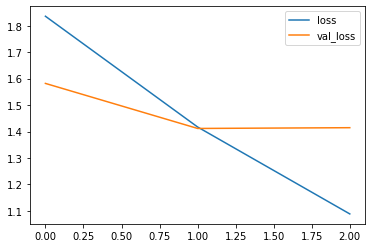

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

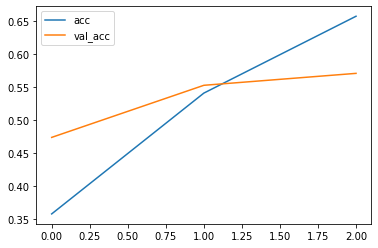

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 4ms/step - loss: 1.5673 - acc: 0.5116
Test Accuracy: 51.156813


#Model CNN (GlobalMaxPooling) 56.812340

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())

#CNN GMP1D(w/o spec): 56.812340
#2CNN GMP1D(w/o spec): 53.470439
#CNN BN GMP1D(w/o spec): 52.956301


model.add(Flatten())
#Flatten(): 56
#w/o Flatten(): 55

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 66, 100)           1260900   
                                                                 
 conv1d_25 (Conv1D)          (None, 64, 32)            9632      
                                                                 
 global_max_pooling1d_10 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 flatten_11 (Flatten)        (None, 32)                0         
                                                                 
 dense_54 (Dense)            (None, 256)               8448      
                                                                 
 dense_55 (Dense)            (None, 13)                3341      
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Current val_loss =  1.24
history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 1s 5ms/step - loss: 1.9095 - acc: 0.3704 - val_loss: 1.5455 - val_acc: 0.4971
Epoch 2/10
152/152 [==============================] - 1s 4ms/step - loss: 1.3467 - acc: 0.5815 - val_loss: 1.3000 - val_acc: 0.5860
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: 0.9939 - acc: 0.6941 - val_loss: 1.2787 - val_acc: 0.5947
Epoch 4/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6894 - acc: 0.7893 - val_loss: 1.3701 - val_acc: 0.5975


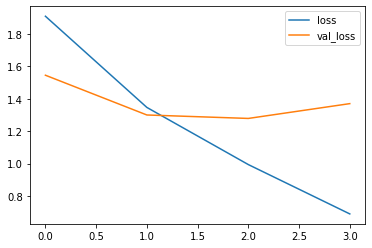

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

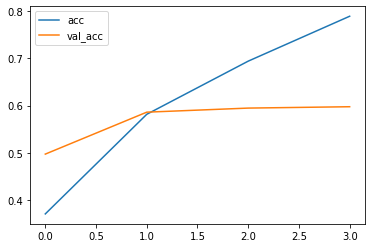

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(Xtest.shape, ytest.shape)

(389, 66) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 2ms/step - loss: 1.5020 - acc: 0.5630
Test Accuracy: 56.298202


#Model CNN1 GMP1D D13: 65

In [18]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [19]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Conv1D(128, 5 , activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

#Result
#CNN128,5 GMP1D D130 D13: 59.897172
#EM1000 CNN128,5 GMP1D D13: 65
#EM1000 CNN128,5 GMP1D D13 CWS: 65 (CWS = class weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 1000)          12609000  
                                                                 
 conv1d (Conv1D)             (None, 62, 128)           640128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                                 
Total params: 13,250,805
Trainable params: 13,250,805
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [22]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
76/76 [==============================] - 3s 18ms/step - loss: 1.7277 - acc: 0.4437 - val_loss: 1.3273 - val_acc: 0.5737
Epoch 2/10
76/76 [==============================] - 1s 14ms/step - loss: 1.0607 - acc: 0.6666 - val_loss: 1.1272 - val_acc: 0.6296
Epoch 3/10
76/76 [==============================] - 1s 15ms/step - loss: 0.6185 - acc: 0.8199 - val_loss: 1.0938 - val_acc: 0.6531
Epoch 4/10
76/76 [==============================] - 1s 15ms/step - loss: 0.2923 - acc: 0.9400 - val_loss: 1.1299 - val_acc: 0.6416


In [23]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100)) #with class weights = 0.64, w/o = 65

13/13 [==============================] - 0s 4ms/step - loss: 1.1961 - acc: 0.6504
Test Accuracy: 65.038562


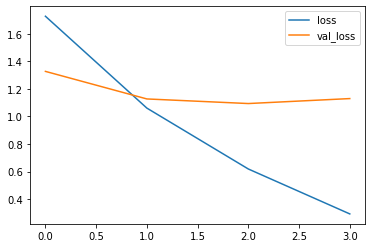

In [24]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

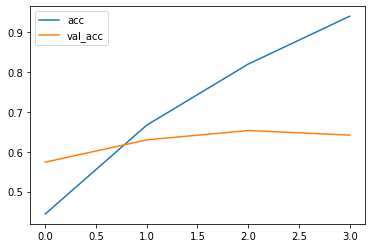

In [25]:
history_frame.loc[:, ['acc', 'val_acc']].plot()